In [3]:
# TODO

# N Sampling
# Use 2D DCT for 16 X 16
# Select 16 highest coefficient

In [4]:
import cv2
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.fftpack import fft, dct, ifft, idct


In [5]:
N = 16
C = [1 / pow(2, 0.5)] + [1 for i in range(N - 1)]

# Use Q Table from paper
# JPEG Steganography: A Performance Evaluation of Quantization Tables
# January 2009
# DOI: 10.1109/AINA.2009.67
# SourceDBLP
# Conference: The IEEE 23rd International Conference on Advanced Information Networking and Applications, AINA 2009, Bradford, United Kingdom, May 26-29, 2009
Q = np.array([
    [ 7,  7,  7,  7,  7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15],
    [ 7,  7,  7,  7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17],
    [ 7,  7,  7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18],
    [ 7,  7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20],
    [ 7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22],
    [ 7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24],
    [ 8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26],
    [ 8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28],
    [ 9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30],
    [ 9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33],
    [10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36],
    [11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39],
    [12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39, 42],
    [13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39, 42, 45],
    [14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39, 42, 45, 49],
    [15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39, 42, 45, 49, 52]
])

def dct2d(img, QF = N):
    Y,X = img.shape
    result = np.zeros(shape=(0,X))
    for y in range(Y // QF):
        tmp = np.zeros(shape=(QF,0))
        for x in range(X // QF):
            tmp = np.hstack([tmp, dct(dct(img[QF*y:QF*(y+1), QF*x:QF*(x+1)].T, norm='ortho').T, norm='ortho')])
        result = np.vstack([result, tmp])
    return result

def idct2d(img, QF = N):
    Y,X = img.shape
    result = np.zeros(shape=(0,X))
    for y in range(Y // QF):
        tmp = np.zeros(shape=(QF,0))
        for x in range(X // QF):
            tmp = np.hstack([tmp, idct(idct(img[QF*y:QF*(y+1), QF*x:QF*(x+1)].T, norm='ortho').T, norm='ortho')])
        result = np.vstack([result, tmp])
    return result

def get_Fvu(v, u, S):
    result = 0
    for y in range(N):
        for x in range(N):
            result += (1/4) * C[u] * C[v] * S[y][x] * np.cos(v*np.pi * (2*y + 1) / (2*N)) * np.cos(u*np.pi * (2*x + 1) / (2*N))
    return result

def get_Syx(y, x, F):
    result = 0
    for v in range(N):
        for u in range(N):
            result += (1/4) * C[v] * C[u] * F[v][u] * np.cos(v*np.pi * (2*y + 1) / (2*N)) * np.cos(u*np.pi * (2*x + 1) / (2*N))
    return result



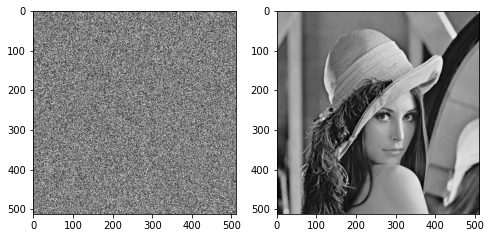

In [6]:
img = np.array(cv2.imread("Lenna.png", 0) ,dtype=np.float64)

d = dct2d(img)
imgcv1 = np.uint8(d*255.0)    # convert back to int
r = idct2d(d)
imgcv2 = r    # convert back to int

fig=plt.figure(figsize=(8, 8))

columns = 2
rows = 1
# for i in range(1, columns*rows +1):
fig.add_subplot(rows, columns, 1)
plt.imshow(imgcv1, cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(imgcv2, cmap='gray')
plt.show()


In [ ]:
img = np.array(cv2.imread("Lenna.png", 0) ,dtype=np.float64)
 
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()
Y, X = img.shape

In [ ]:
F = []
for y in range(Y // N):
    for x in range(X // N):
        tmp = np.zeros(shape = (N, N))
        for v in range(N):
            for u in range(N):
                tmp[v][u] = get_Fvu(v, u, img[N*y:N*(y+1), N*x:N*(x+1)])
        F.append(tmp)

In [ ]:
k = list(map(int, input().split()))

In [ ]:
Q

In [ ]:
from scipy.fftpack import fft, dct, ifft, idct


In [ ]:
d = dct(dct(Q.T, norm='ortho').T, norm='ortho')

In [ ]:
d.shape

In [ ]:
d[0][0]

In [ ]:
r = idct(idct(d.T, norm='ortho').T, norm='ortho')

In [ ]:
Q - r

In [ ]:
r